# Data Description

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility), the number of bikes rented per hour and date information.

-  Attribute Information:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading CSV file.
bike_rent_df=pd.read_csv("hour.csv",)

# Data Exploration And Data Cleaning

In [4]:
# Check 1st Five rows
bike_rent_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Check last 5 rows
bike_rent_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(bike_rent_df.shape)} \n Total Rows are : {(bike_rent_df.shape)[0]}\n Total Columns are : {(bike_rent_df.shape)[1]}')

 The shape of dataset is (17379, 17) 
 Total Rows are : 17379
 Total Columns are : 17


In [7]:
# Check the info of dataset to know the data types of columns or variable
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Observations

## 1)Null values/missing values- 0
## 2)Date- columns need to convert into proper data type.
## 3)Columns to convert into numeric(for modelling Purpose)
 - season
 - holiday
 - workingday

In [8]:
# Check columns
bike_rent_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike_rent_df = bike_rent_df.drop('instant',axis=1)

In [10]:
bike_rent_df['dteday']=bike_rent_df['dteday'].astype('datetime64[ns]')

In [11]:
bike_rent_df['Month']=bike_rent_df['dteday'].dt.month

bike_rent_df['Day']=bike_rent_df['dteday'].dt.day_name()

In [12]:
bike_rent_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,Saturday
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,Saturday
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,Saturday
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,Saturday
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,12,Monday
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,12,Monday
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,12,Monday
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,12,Monday


In [13]:
bike_rent_df['Weekdays_or_weekend']=bike_rent_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [14]:
bike_rent_df.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,Saturday,1
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,Saturday,1


In [15]:
bike_rent_df.drop("dteday",axis=1 ,inplace=True)

In [16]:
bike_rent_df.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [17]:
bike_rent_df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [18]:
bike_rent_df.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [19]:
bike_rent_df.mnth.value_counts()

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

In [20]:
bike_rent_df['Weekdays_or_weekend'].value_counts()

0    12365
1     5014
Name: Weekdays_or_weekend, dtype: int64

In [21]:
bike_rent_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,6.537775,0.288509
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,3.438776,0.453082
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,4.000000,0.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,7.000000,0.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,10.000000,1.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,12.000000,1.000000


In [22]:
bike_rent_df.isnull().sum()

season                 0
yr                     0
mnth                   0
hr                     0
holiday                0
weekday                0
workingday             0
weathersit             0
temp                   0
atemp                  0
hum                    0
windspeed              0
casual                 0
registered             0
cnt                    0
Month                  0
Day                    0
Weekdays_or_weekend    0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

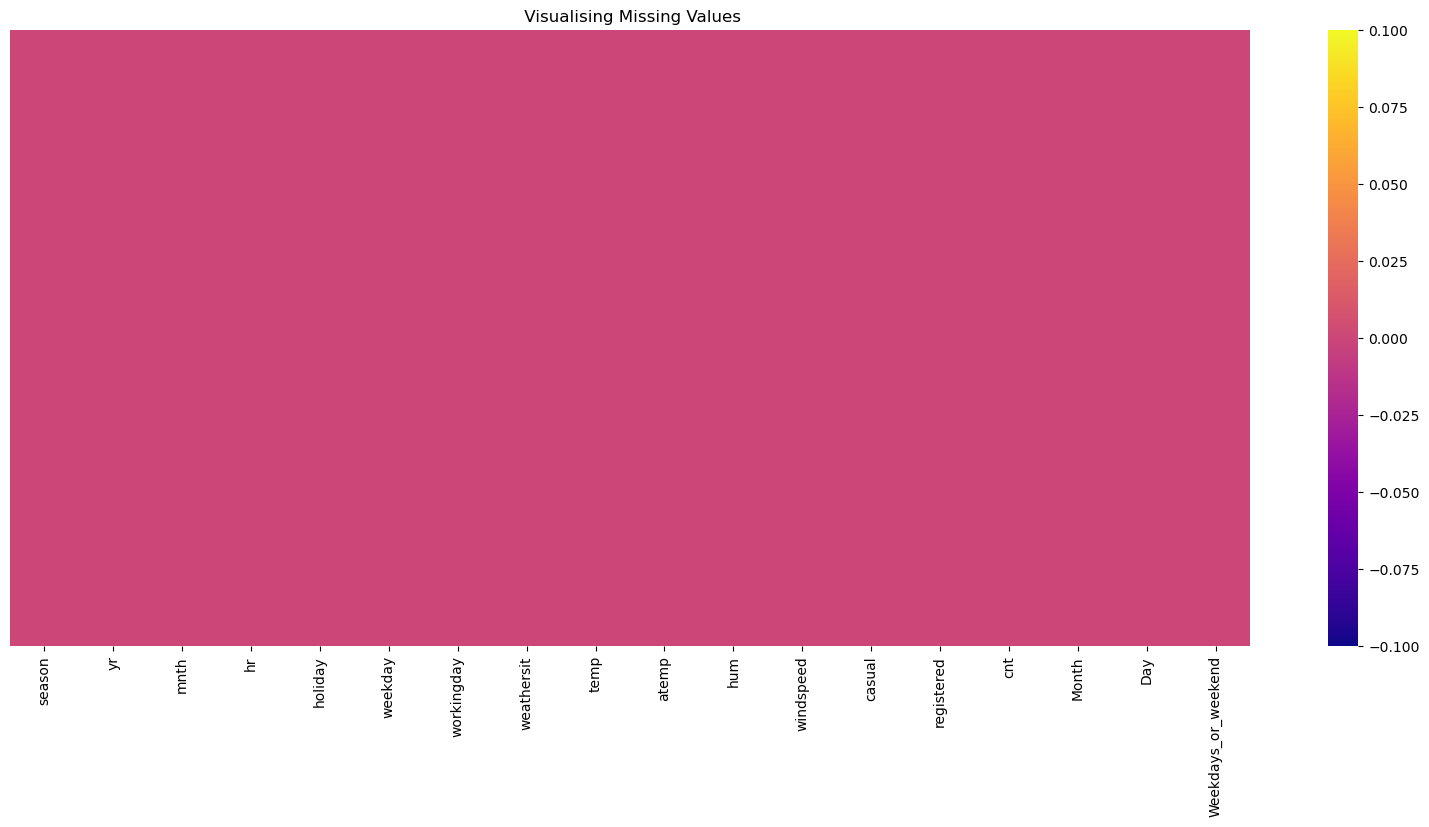

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(bike_rent_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

In [24]:
bike_rent_df['season']=bike_rent_df['season'].astype('category')
bike_rent_df['weathersit']=bike_rent_df['weathersit'].astype('category')
bike_rent_df['mnth']=bike_rent_df['mnth'].astype('category')
bike_rent_df['weekday']=bike_rent_df['weekday'].astype('category')

In [25]:
# numeric columns list
numeric_col=['temp',
 'atemp',
 'hum',
 'windspeed',]
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

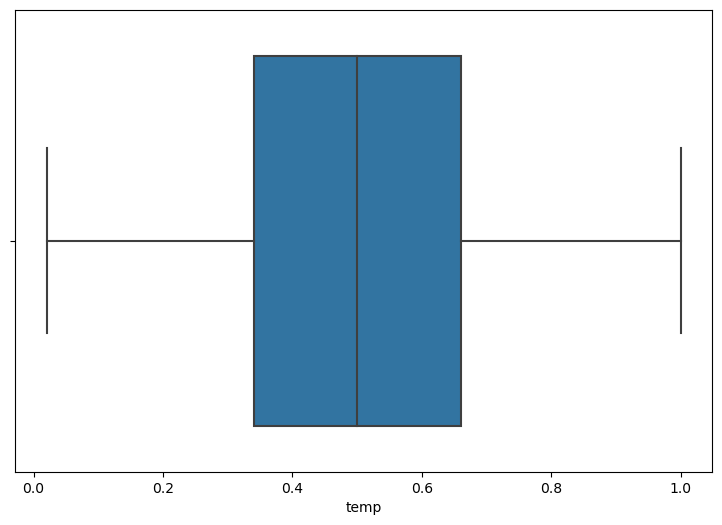

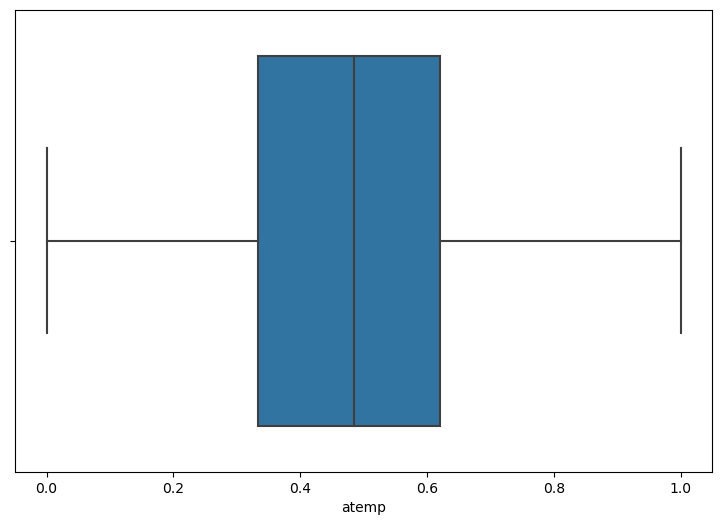

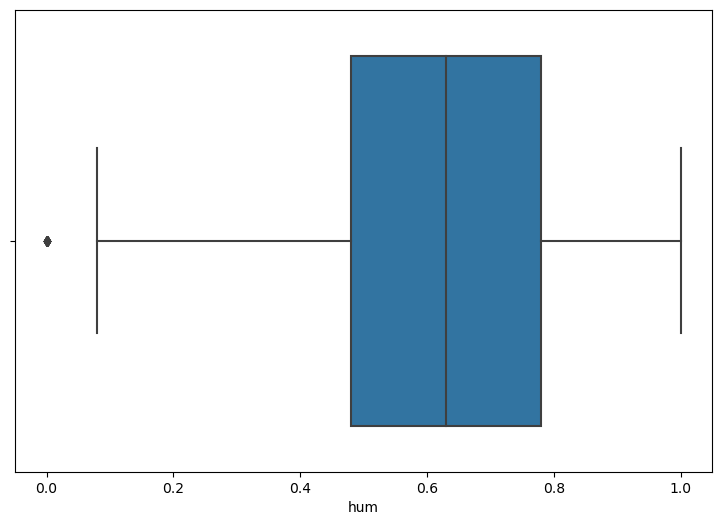

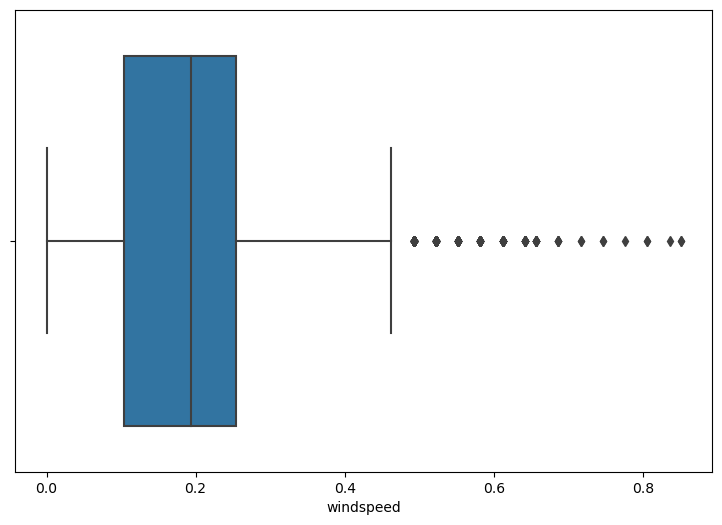

In [26]:
for i in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_rent_df[i],orient="h")

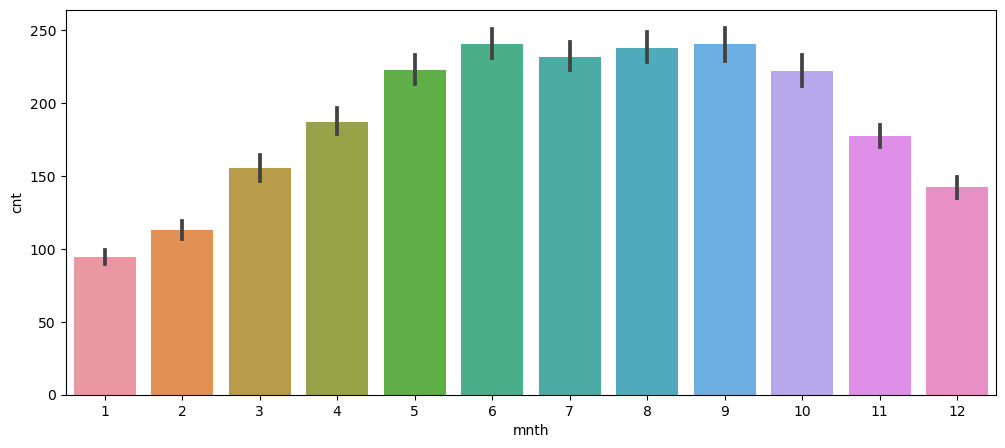

In [27]:
fig = plt.figure(figsize=(12, 5))

sns.barplot(x=bike_rent_df['mnth'],y=bike_rent_df['cnt']);

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

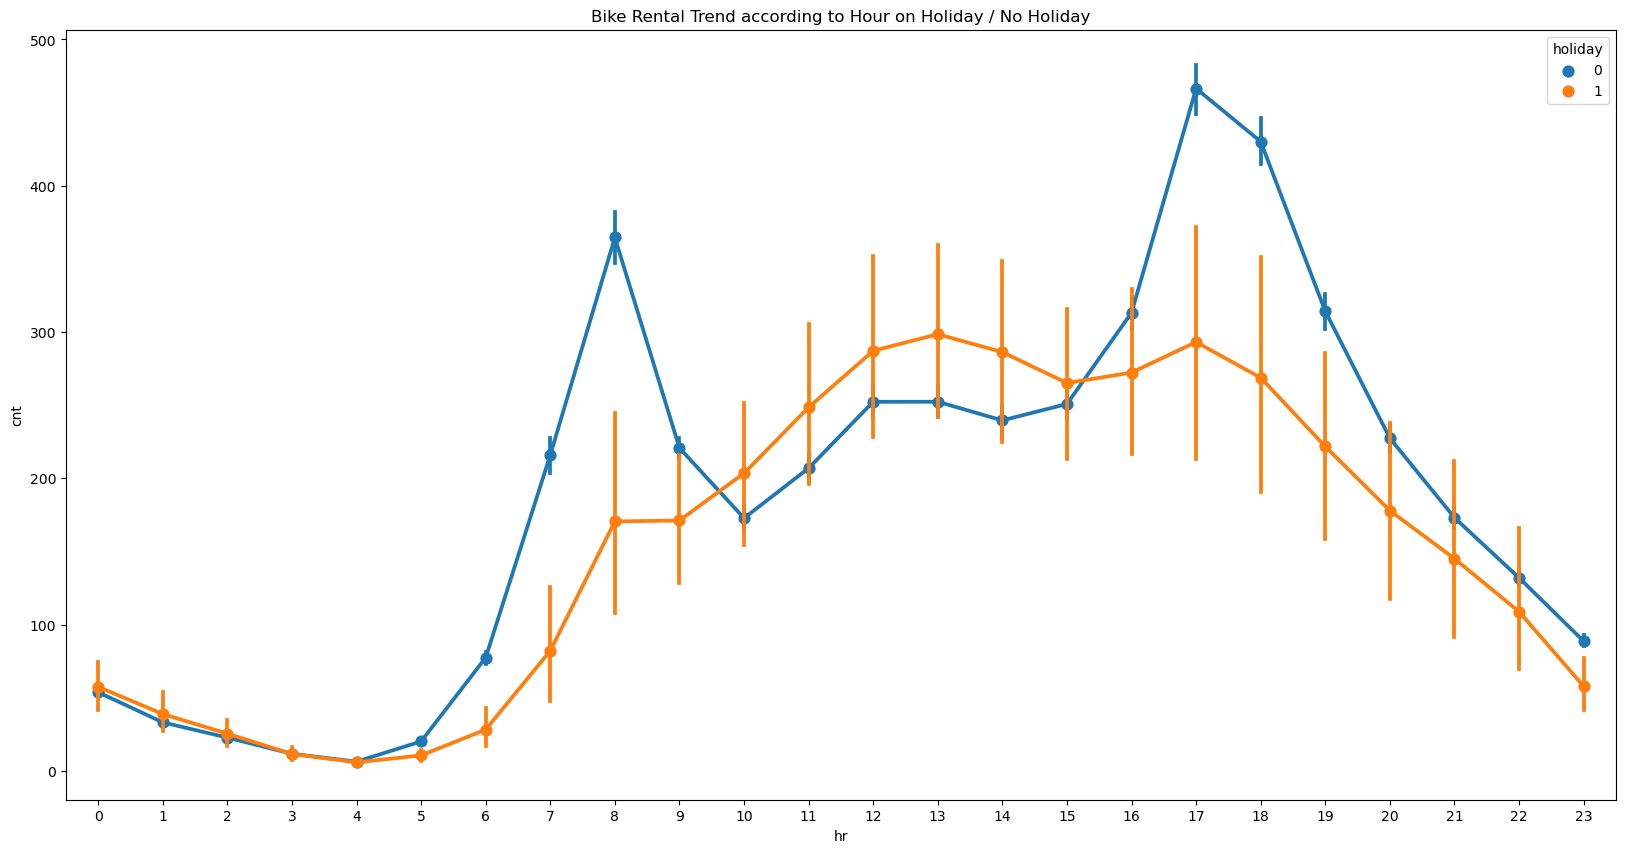

In [28]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Functioning day')

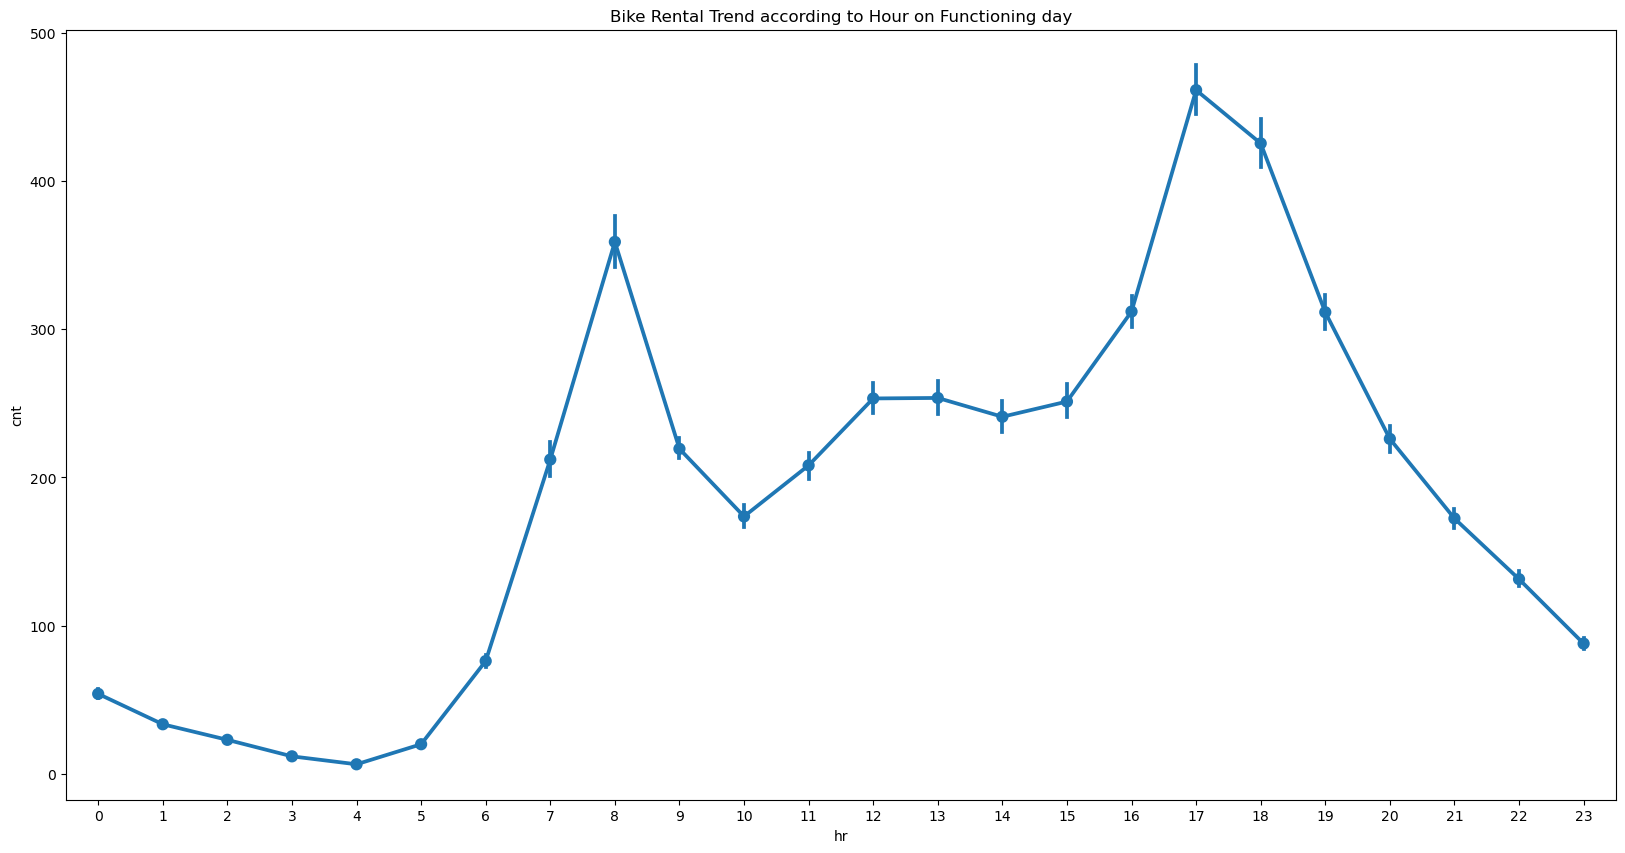

In [29]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'])
plt.title("Bike Rental Trend according to Hour on Functioning day")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

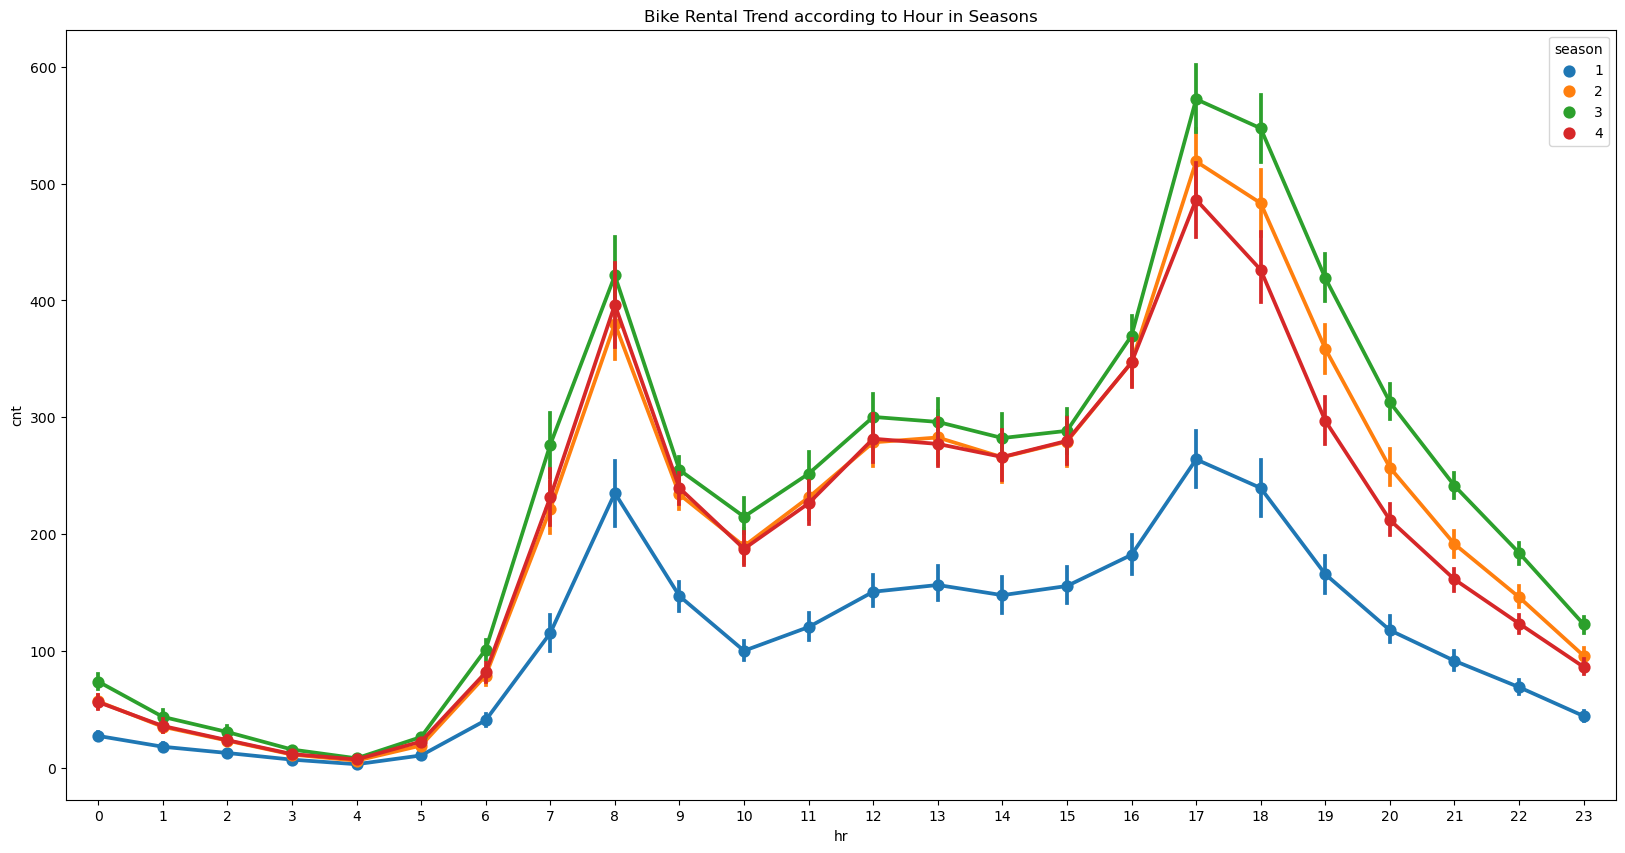

In [30]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['season'])
plt.title("Bike Rental Trend according to Hour in Seasons")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in different months')

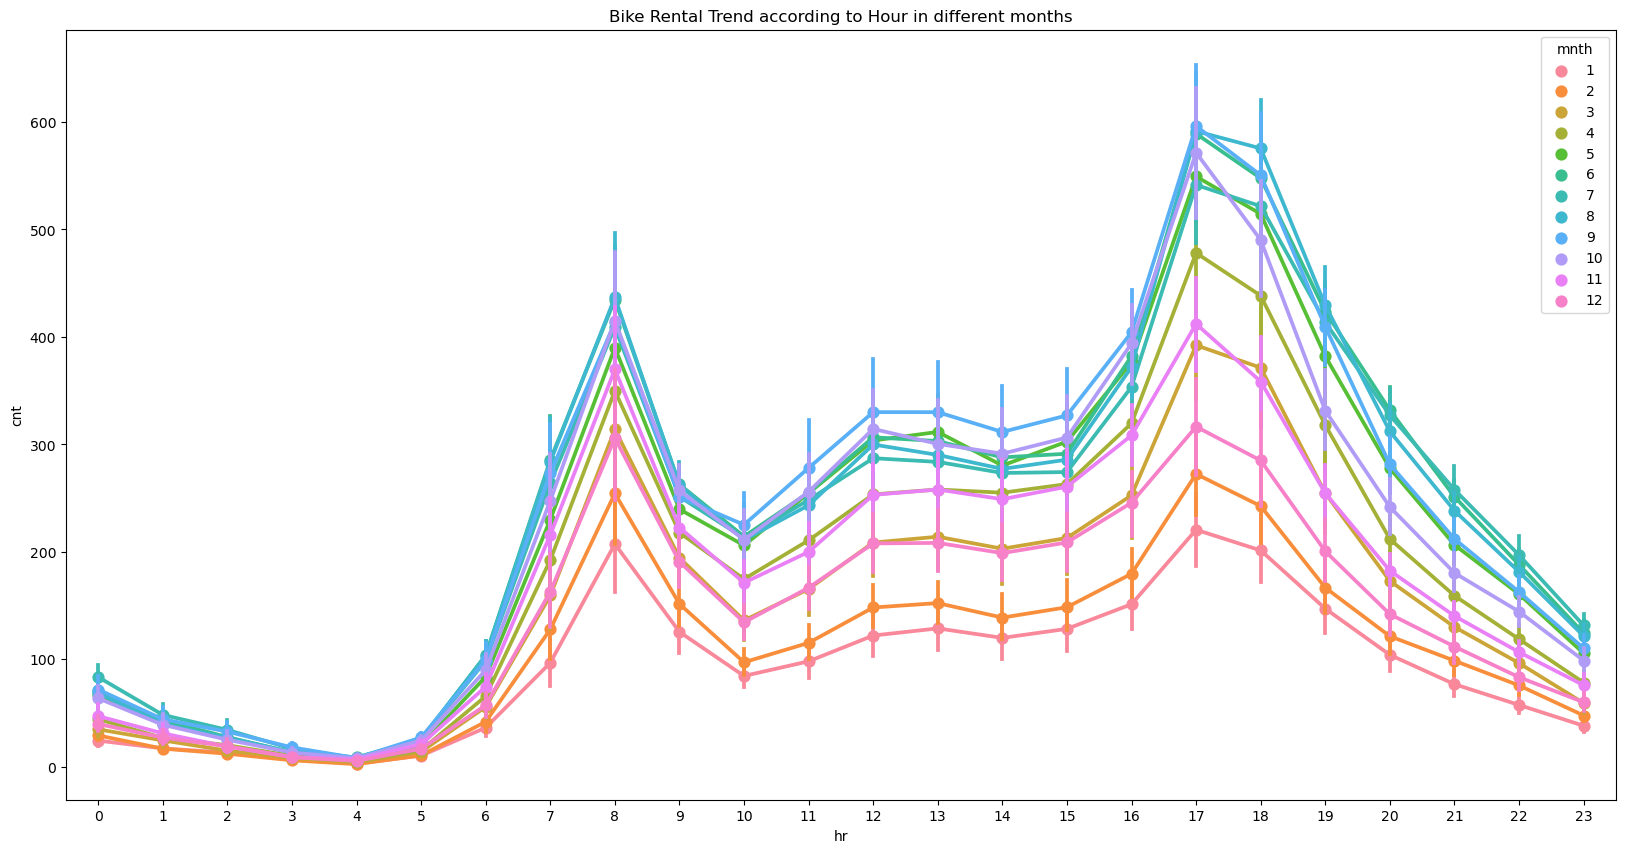

In [31]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['mnth'])
plt.title("Bike Rental Trend according to Hour in different months")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

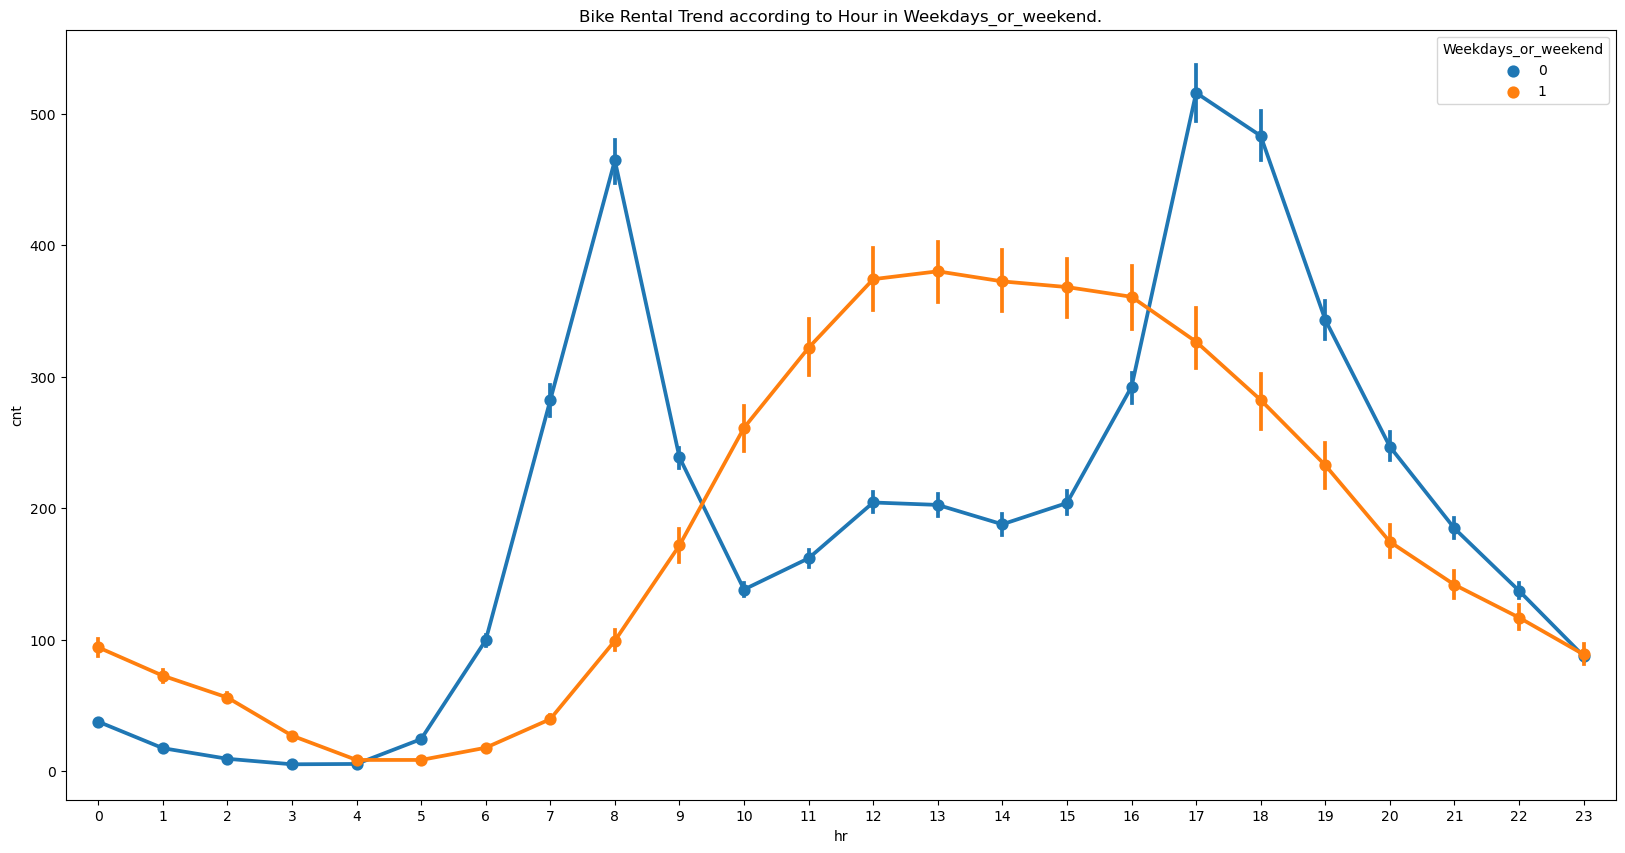

In [32]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_rent_df['hr'],y=bike_rent_df['cnt'],hue=bike_rent_df['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")

<AxesSubplot:ylabel='Density'>

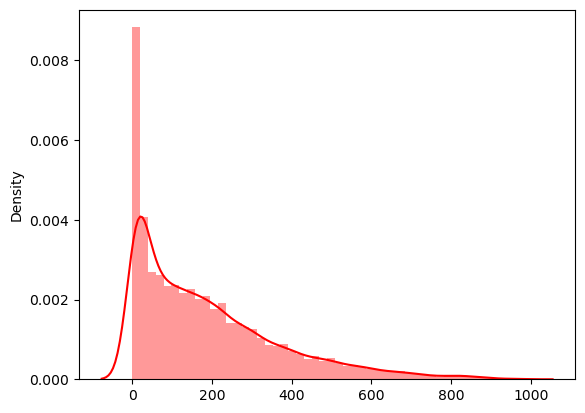

In [33]:
sns.distplot(x=bike_rent_df['cnt'],color='red')

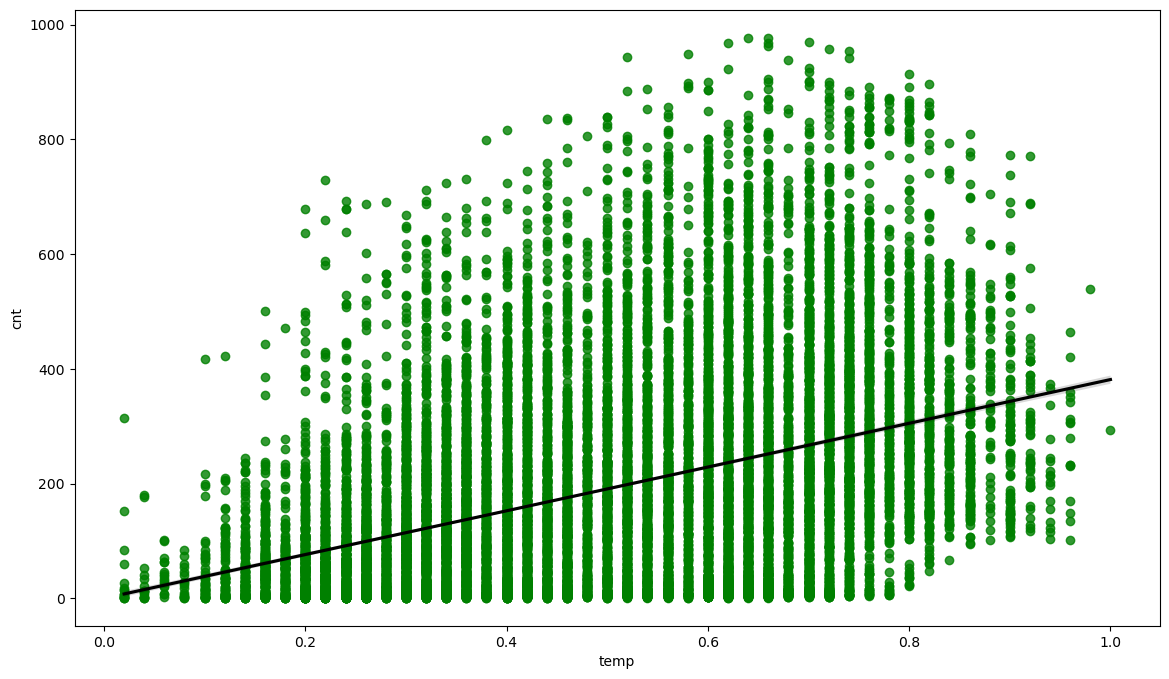

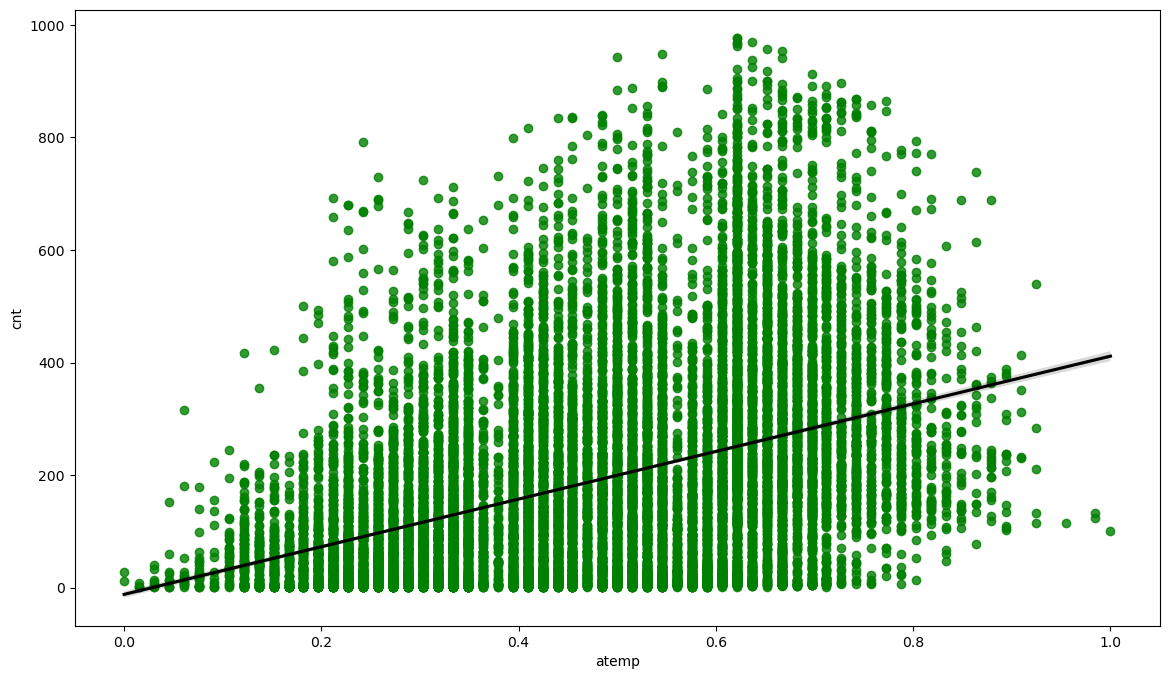

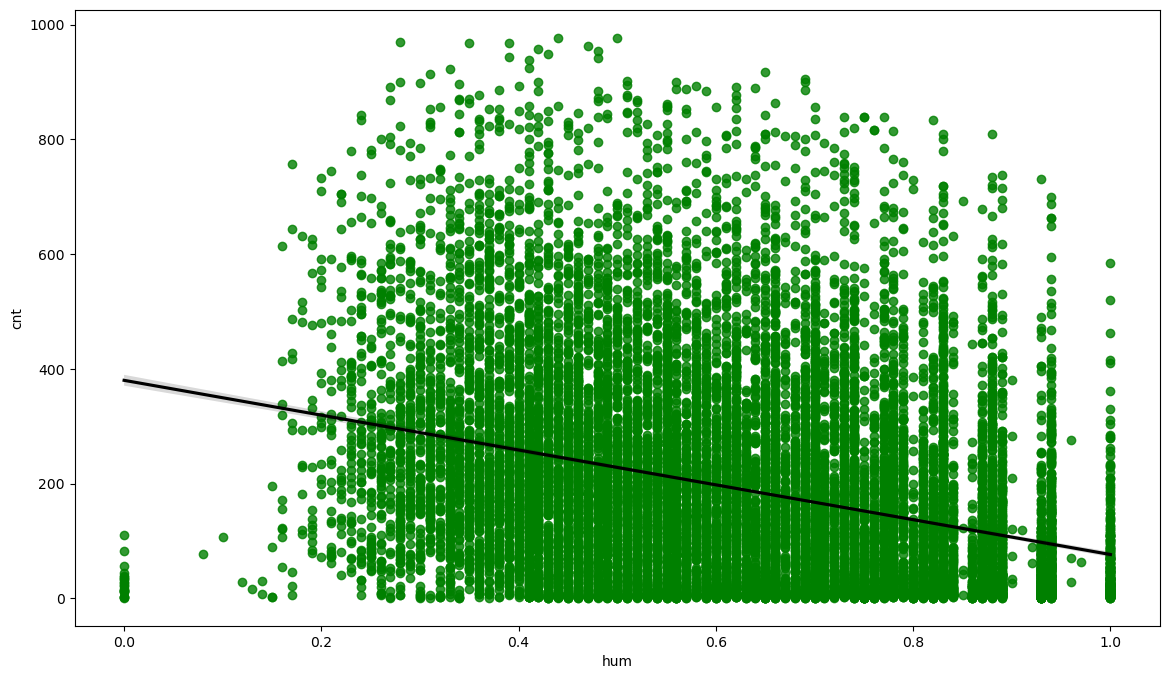

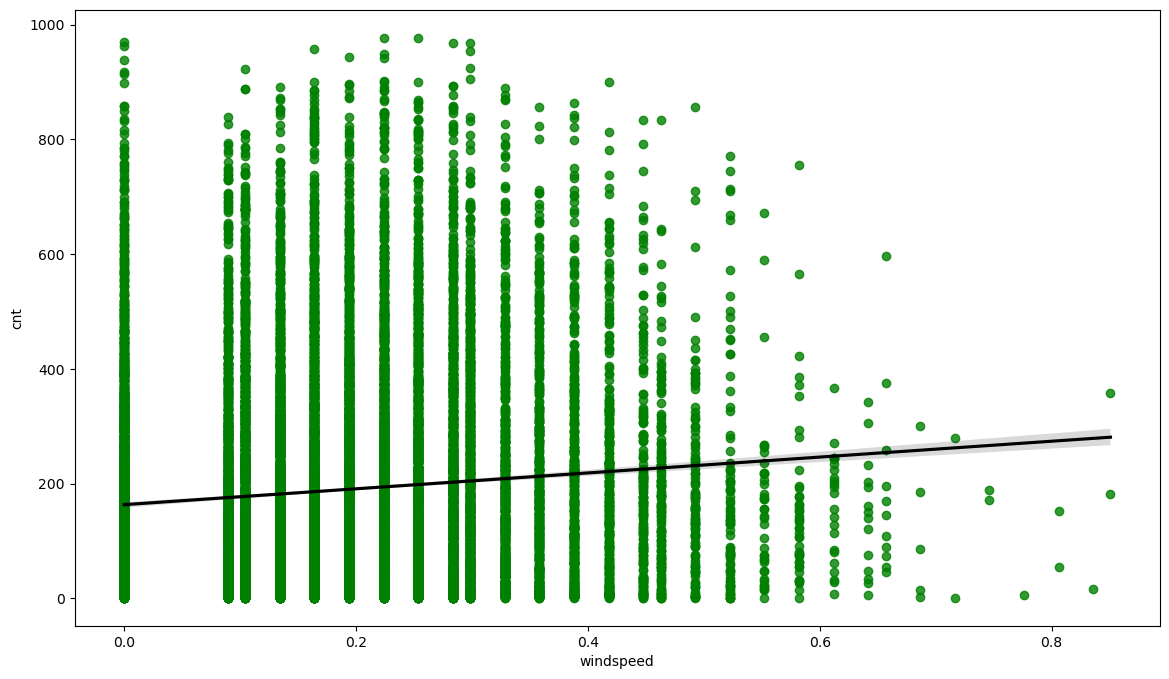

In [34]:
for col in numeric_col:
    plt.figure(figsize=(14,8))
    ax=fig.gca()
    sns.regplot(x=bike_rent_df[col],y=bike_rent_df['cnt'],scatter_kws={'color':'green'},line_kws={'color':'black'})

<AxesSubplot:>

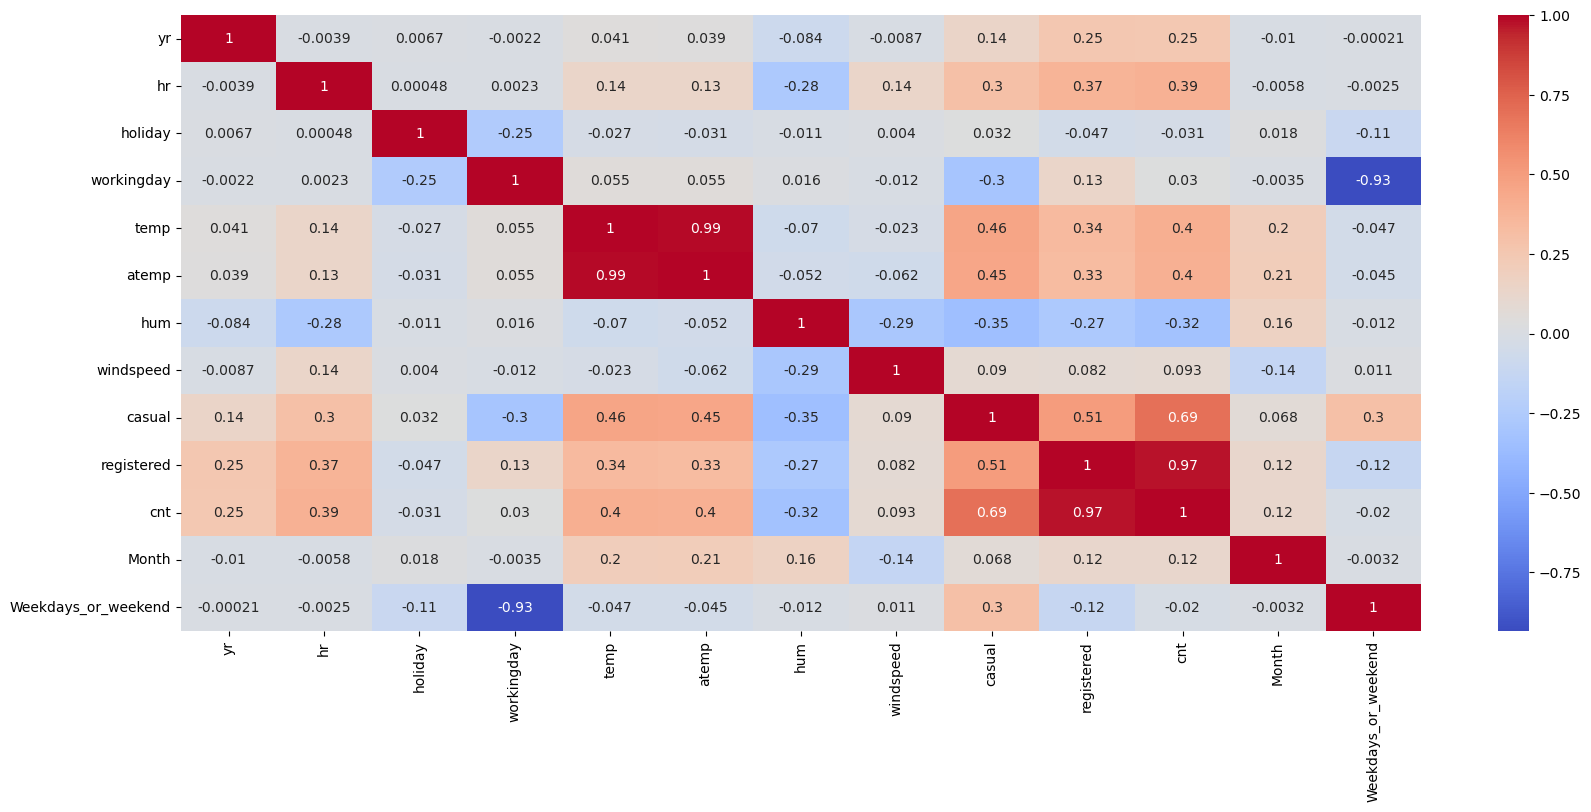

In [35]:
plt.figure(figsize=(20,8))
corr=bike_rent_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [36]:
df=bike_rent_df.copy()

In [37]:
df.drop(['casual','registered'],inplace=True,axis=1)

In [38]:
df['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [39]:
df['season']=df['season'].astype('category')

In [40]:
df=pd.get_dummies(df,columns=['season'])

In [41]:
df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [42]:
df.drop("Day",axis=1 ,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   yr                   17379 non-null  int64   
 1   mnth                 17379 non-null  category
 2   hr                   17379 non-null  int64   
 3   holiday              17379 non-null  int64   
 4   weekday              17379 non-null  category
 5   workingday           17379 non-null  int64   
 6   weathersit           17379 non-null  category
 7   temp                 17379 non-null  float64 
 8   atemp                17379 non-null  float64 
 9   hum                  17379 non-null  float64 
 10  windspeed            17379 non-null  float64 
 11  cnt                  17379 non-null  int64   
 12  Month                17379 non-null  int64   
 13  Weekdays_or_weekend  17379 non-null  int64   
 14  season_1             17379 non-null  uint8   
 15  season_2           

In [44]:
X=df.drop('cnt',axis=1)
y=np.sqrt(df['cnt'])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12165, 17)
(12165,)
(5214, 17)
(5214,)


In [48]:
from sklearn.linear_model import LinearRegression

l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [49]:
l_reg.coef_

array([ 2.51217387,  0.09195178,  8.56398193, -0.67559239,  0.51466653,
        0.33285574, -0.42980869,  7.38254478,  6.57464789, -7.24877682,
        1.15904015,  0.09195178,  0.34273665, -0.65457001,  0.02984885,
       -1.07236691,  1.69708806])

In [50]:
l_reg.intercept_

3.425208474899989

In [51]:
l_reg.score(X_train,y_train)

0.47512574971891575

In [52]:
y_pred_train=l_reg.predict(X_train)
y_pred_test=l_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [54]:
def perfomance_maeasure_train(reg,X_train, X_test, y_train, y_test, train=True,test=True):
    
    MAE= mean_absolute_error(y_train,reg.predict(X_train))
    #print(f"The Mean Absolute Error (MAE) is {MAE}.")

    MSE=mean_squared_error(y_train,reg.predict(X_train))
    #print(f"The Mean Squred Error(MSE) is {MSE}.")

    RMSE=np.sqrt(MSE)
    #print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

    R2=r2_score(y_train,reg.predict(X_train))
    #print(f"The R2 Score is {R2}.")
    
    traing_results_df=pd.DataFrame({'Model':reg.__class__.__name__,'MAE':round(MAE,4),'MSE':round(MSE,4),'RMSE':round(RMSE,4),'R2_score':round(R2,4)},index=[1])
    return traing_results_df

In [55]:
def perfomance_maeasure_test(reg,X_train, X_test, y_train, y_test, train=True,test=True):
    
    MAE= mean_absolute_error(y_test,reg.predict(X_test))
    #print(f"The Mean Absolute Error (MAE) is {MAE}.")

    MSE=mean_squared_error(y_test,reg.predict(X_test))
    #print(f"The Mean Squred Error(MSE) is {MSE}.")

    RMSE=np.sqrt(MSE)
    #print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

    R2=r2_score(y_test,reg.predict(X_test))
    #print(f"The R2 Score is {R2}.")
    
    traing_results_df=pd.DataFrame({'Model':reg.__class__.__name__,'MAE':round(MAE,4),'MSE':round(MSE,4),'RMSE':round(RMSE,4),'R2_score':round(R2,4)},index=[1])
    
    return traing_results_df 

In [56]:
perfomance_maeasure_train(l_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,3.8532,23.6899,4.8672,0.4751


In [57]:
perfomance_maeasure_test(l_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,3.7768,23.0416,4.8002,0.4875


# lasso

In [58]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.01)

In [59]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [60]:
lasso_reg.coef_

array([ 2.47949232,  0.        ,  8.54883355, -0.67171547,  0.43827761,
        0.        , -0.22845532,  8.77580511,  4.30289401, -7.20559237,
        0.60353933,  0.        ,  0.        , -0.78422074,  0.        ,
       -0.9132476 ,  1.67088803])

In [61]:
lasso_reg.score(X_train,y_train)

0.47459536489241305

In [62]:
lasso_reg.score(X_test,y_test)

0.4874420567482429

In [63]:
lasso_reg.intercept_

4.382865327891191

In [64]:
y_pred_train=lasso_reg.predict(X_train)
y_pred_test=lasso_reg.predict(X_test)

In [65]:
perfomance_maeasure_train(lasso_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,Lasso,3.8563,23.7139,4.8697,0.4746


In [66]:
perfomance_maeasure_test(lasso_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,Lasso,3.7782,23.0447,4.8005,0.4874


# Ridge

In [67]:
from sklearn.linear_model import Ridge

ridge_lg=Ridge(alpha=0.1)
ridge_lg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [68]:
ridge_lg.coef_

array([ 2.51219713,  0.09199516,  8.56378791, -0.6754507 ,  0.51464771,
        0.33280755, -0.43047564,  7.38038311,  6.57276691, -7.2472628 ,
        1.15939922,  0.09199516,  0.34264314, -0.65521105,  0.03007253,
       -1.07155314,  1.69669166])

In [69]:
ridge_lg.intercept_

3.4263182111881925

In [70]:
y_pred_train_ridge=ridge_lg.predict(X_train)
y_pred_test_ridge=ridge_lg.predict(X_test)

In [71]:
perfomance_maeasure_train(ridge_lg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,Ridge,3.8532,23.6899,4.8672,0.4751


In [72]:
perfomance_maeasure_test(ridge_lg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,Ridge,3.7768,23.0417,4.8002,0.4875


# ElasticNet

In [73]:
from sklearn.linear_model import ElasticNet

elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [74]:
elastic_net_reg.score(X_train,y_train)

0.47509053296388737

In [75]:
elastic_net_reg.score(X_test,y_test)

0.48741546163164884

In [76]:
y_pred_train=elastic_net_reg.predict(X_train)
y_pred_test=elastic_net_reg.predict(X_test)

In [77]:
perfomance_maeasure_train(elastic_net_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,ElasticNet,3.8545,23.6915,4.8674,0.4751


In [78]:
perfomance_maeasure_test(elastic_net_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,ElasticNet,3.7783,23.0459,4.8006,0.4874


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

D_tree.fit(X_train,y_train)

D_tree.score(X_train,y_train)

0.9148588772802803

In [80]:
D_tree.score(X_test,y_test)

0.8840524806057247

In [81]:
y_pred_train=D_tree.predict(X_train)
y_pred_test=D_tree.predict(X_test)

In [82]:
perfomance_maeasure_train(D_tree,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,DecisionTreeRegressor,1.3668,3.8428,1.9603,0.9149


In [83]:
perfomance_maeasure_test(D_tree,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,DecisionTreeRegressor,1.5885,5.213,2.2832,0.8841


# Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
rf.score(X_train,y_train)

0.993660011619825

In [86]:
rf.score(X_test,y_test)

0.9501244722838289

In [87]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [88]:
perfomance_maeasure_train(rf,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,RandomForestRegressor,0.3662,0.2862,0.5349,0.9937


In [89]:
perfomance_maeasure_test(rf,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,RandomForestRegressor,1.0087,2.2424,1.4975,0.9501


# Gradient Boosting Regressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [91]:
gradboo_reg.score(X_train,y_train)

0.8953053400325134

In [92]:
gradboo_reg.score(X_test,y_test)

0.8887312548626448

In [93]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred_test=gradboo_reg.predict(X_test)

In [94]:
perfomance_maeasure_train(gradboo_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,GradientBoostingRegressor,1.6184,4.7253,2.1738,0.8953


In [95]:
perfomance_maeasure_test(gradboo_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,GradientBoostingRegressor,1.6659,5.0027,2.2367,0.8887


# Xtream-Gredient-Boosting

In [96]:
from xgboost.sklearn import XGBRegressor

xgb_reg=XGBRegressor()
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [97]:
xgb_reg.score(X_train,y_train)

0.9812549848647035

In [98]:
xgb_reg.score(X_test, y_test)

0.9571600581685983

In [99]:
y_pred_train=xgb_reg.predict(X_train)
y_pred_test=xgb_reg.predict(X_test)

In [100]:
perfomance_maeasure_train(xgb_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,XGBRegressor,0.6613,0.846,0.9198,0.9813


In [101]:
perfomance_maeasure_test(xgb_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,XGBRegressor,0.9613,1.9261,1.3878,0.9572


In [102]:
perfomance_maeasure_test(l_reg,X_train, X_test, y_train, y_test, train=True,test=True)

,Model,MAE,MSE,RMSE,R2_score
1,LinearRegression,3.7768,23.0416,4.8002,0.4875


In [103]:
xg_red = pd.DataFrame({'Actual Value': y_test, 'Predict Value': rf.predict(X_test)})
xg_red.head(10)

,Actual Value,Predict Value
3439,2.645751,2.671773
6542,2.236068,2.183941
15470,27.258026,20.364523
9851,14.422205,13.490199
12640,18.248288,17.273209
1427,13.674794,13.300089
15888,11.135529,12.170790
14772,30.413813,30.533562
15725,14.560220,13.801408
1057,12.688578,11.153148
